In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# READING FILE 

In [2]:
read_file = pd.read_excel("C:/Users/SAKSHAM MITTAL/Downloads/4 dec/DS - Assignment Part 1 data set.xlsx")
read_file.to_csv ("C:/Users/SAKSHAM MITTAL/Downloads/4 dec/DS - Assignment Part 1 data set.csv",index = None, header=True)
df = pd.DataFrame(pd.read_csv("C:/Users/SAKSHAM MITTAL/Downloads/4 dec/DS - Assignment Part 1 data set.csv"))
df.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,1905-07-04 22:00:00.000,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1905-07-04 22:00:00.003,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,1905-07-05 13:59:59.997,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,1905-07-05 12:00:00.000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,1905-07-04 19:59:59.997,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df['Transaction date'] = pd.to_datetime(df['Transaction date']).dt.date
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,1905-07-04,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1905-07-04,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,1905-07-05,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,1905-07-05,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,1905-07-04,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# CHECKING OUTLIYERS AND CORRELATION

In [4]:
df.shape


(414, 9)

In [5]:
df.describe()
# no outliyers

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    object 
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 29.2+ KB


In [7]:
df.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


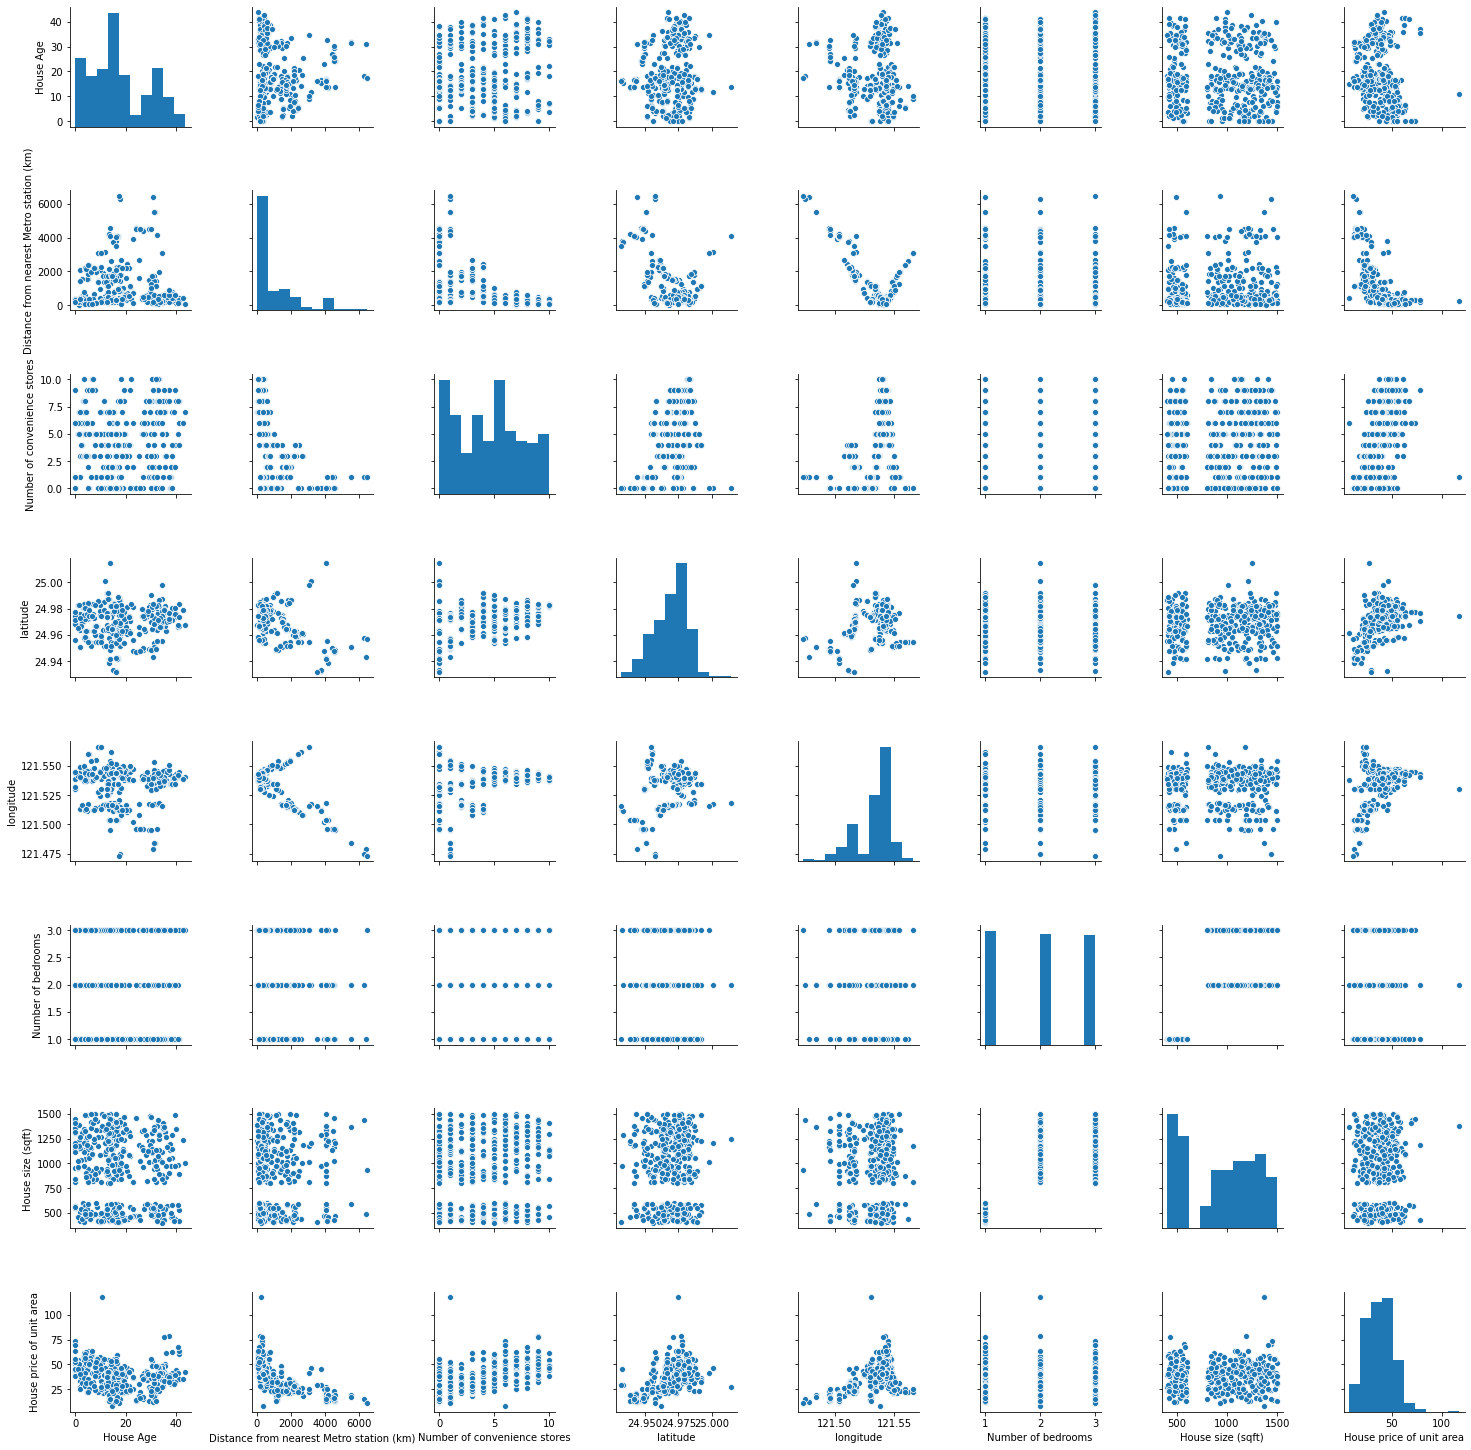

In [8]:
sns.pairplot(df)

In [9]:
file= df.drop(columns= "Transaction date", axis = 1)

In [10]:
X = file.drop(columns="House price of unit area" , axis =1)
Y = file["House price of unit area"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[:1]

array([[ 0.01408796, -0.56586101, -1.0934817 ,  0.49431585, -0.19002677,
         1.3330562 ,  0.92188585]])

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=3)).mean()
    return rmse
    

def evaluation(Y, predictions):
    mae = mean_absolute_error(Y, predictions)
    mse = mean_squared_error(Y, predictions)
    rmse = np.sqrt(mean_squared_error(Y, predictions))
    r_squared = r2_score(Y, predictions)
    return mae, mse, rmse, r_squared

In [16]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [18]:
y_pred = lin_reg.predict(X_test)
y_pred

array([32.97843075, 48.43346709, 22.5734385 , 15.47121127, 44.27127908,
       33.34264973, 32.48256955, 44.38895197, 39.43358851, 12.4144848 ,
       13.92454808, 39.05960769, 30.55558359, 45.17772976, 51.96124305,
       33.68903713, 45.02479479, 42.6255362 , 32.39125343, 45.65517421,
       53.4995999 , 30.4530271 , 40.09874198, 49.04332446, 45.58265076,
       29.4789747 , 35.3617115 , 44.26117261, 47.36438903, 14.10653862,
       36.39630947, 35.99241788, 39.56177535, 44.97819885, 49.53691692,
       15.16620459, 41.50295388, 41.6543481 , 37.5791069 , 15.40103091,
       42.46413376, 25.37738091, 53.13678214, 34.56905401, 33.810736  ,
       39.77134186, 34.16411041, 41.65965511, 44.07668492, 33.03980151,
       14.06678668, 43.11492812, 47.51149021, 17.11984423, 50.523944  ,
       43.46687737, 43.82040599, 38.31041408, 40.05328082, 41.90405109,
       26.63785063, 42.70409908, 35.03409804, 14.52989597, 39.94252877,
       45.13731776, 40.26711017, 45.71135619, 15.46546024, 38.55

In [19]:
Y_test

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
       ... 
164    55.2
228    46.6
39     46.2
261    24.4
185    21.5
Name: House price of unit area, Length: 104, dtype: float64

In [20]:

mae, mse, rmse, r_squared = evaluation(Y_test, y_pred)
rmse_cross_val = rmse_cv(lin_reg)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'LinearRegression', 'MAE': 5.93172658164483, 'MSE': 58.994896620325235, 'RMSE': 7.680813538963515, 'R2 Score': 0.6658816142199437, 'RMSE (Cross-Validation)': 9.10444460625443}


# Lasso

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)

In [22]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_lasso)
rmse_cross_val = rmse_cv(lasso)
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'Lasso', 'MAE': 5.972949113921887, 'MSE': 61.8239075998065, 'RMSE': 7.862818044429523, 'R2 Score': 0.6498594727133395, 'RMSE (Cross-Validation)': 9.384065708954985}


# Rigde

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)

In [24]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_ridge)
rmse_cross_val = rmse_cv(ridge)
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'Ridge', 'MAE': 5.928967286779352, 'MSE': 58.90503528984458, 'RMSE': 7.674961582304147, 'R2 Score': 0.6663905450665809, 'RMSE (Cross-Validation)': 9.390709099035066}


# ElasticNet

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train, Y_train)
y_pred_elasticnet= elastic_net.predict(X_test)

In [26]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_elasticnet)
rmse_cross_val = rmse_cv(elastic_net)
new_row = {"Model": "Elastic Net","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'Elastic Net', 'MAE': 6.328651129170586, 'MSE': 66.49619212512003, 'RMSE': 8.154519736018795, 'R2 Score': 0.6233979268350636, 'RMSE (Cross-Validation)': 9.384317710943838}


# RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_rfr = random_forest.predict(X_test)

In [28]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_rfr)
rmse_cross_val = rmse_cv(random_forest)
new_row = {"Model": "RandomForest","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'RandomForest', 'MAE': 4.940942307692304, 'MSE': 52.65869965384616, 'RMSE': 7.25663142607134, 'R2 Score': 0.7017667504555263, 'RMSE (Cross-Validation)': 7.76251806098756}


# SVR

In [29]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
y_pred_svr = svr.predict(X_test)

In [30]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_svr)
rmse_cross_val = rmse_cv(svr)
new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'SVR', 'MAE': 5.87161190121662, 'MSE': 60.67658712542186, 'RMSE': 7.789517772328519, 'R2 Score': 0.6563573375598684, 'RMSE (Cross-Validation)': 9.57297807790867}


# Xgboost

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

In [32]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_svr)
rmse_cross_val = rmse_cv(xgb)
new_row = {"Model": "Xgboost","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'Xgboost', 'MAE': 5.87161190121662, 'MSE': 60.67658712542186, 'RMSE': 7.789517772328519, 'R2 Score': 0.6563573375598684, 'RMSE (Cross-Validation)': 7.966219508375652}


# PolynomialFeatures

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, Y_train)
y_pred_pf = lin_reg.predict(X_test_2d)

In [34]:
mae, mse, rmse, r_squared = evaluation(Y_test, y_pred_pf)
rmse_cross_val = rmse_cv(lin_reg)
new_row = {"Model": "PolynomailFeature","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
print(new_row)
models = models.append(new_row, ignore_index=True)

{'Model': 'PolynomailFeature', 'MAE': 5.464734012559594, 'MSE': 50.01554053975876, 'RMSE': 7.072166608597309, 'R2 Score': 0.7167363174376044, 'RMSE (Cross-Validation)': 9.10444460625443}


# Accuracy 

In [35]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,RandomForest,4.940942,52.658700,7.256631,0.701767,7.762518
6,Xgboost,5.871612,60.676587,7.789518,0.656357,7.966220
0,LinearRegression,5.931727,58.994897,7.680814,0.665882,9.104445
7,PolynomailFeature,5.464734,50.015541,7.072167,0.716736,9.104445
1,Lasso,5.972949,61.823908,7.862818,0.649859,9.384066
3,Elastic Net,6.328651,66.496192,8.154520,0.623398,9.384318
2,Ridge,5.928967,58.905035,7.674962,0.666391,9.390709
5,SVR,5.871612,60.676587,7.789518,0.656357,9.572978


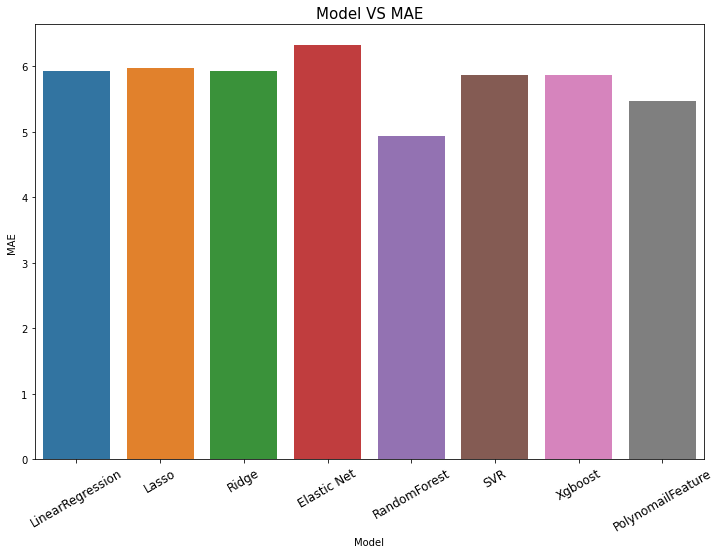

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("Model VS MAE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

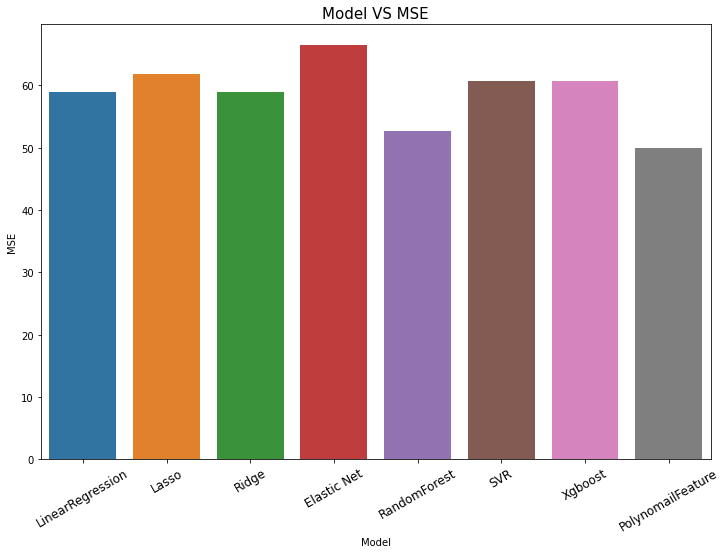

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MSE"])
plt.title("Model VS MSE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

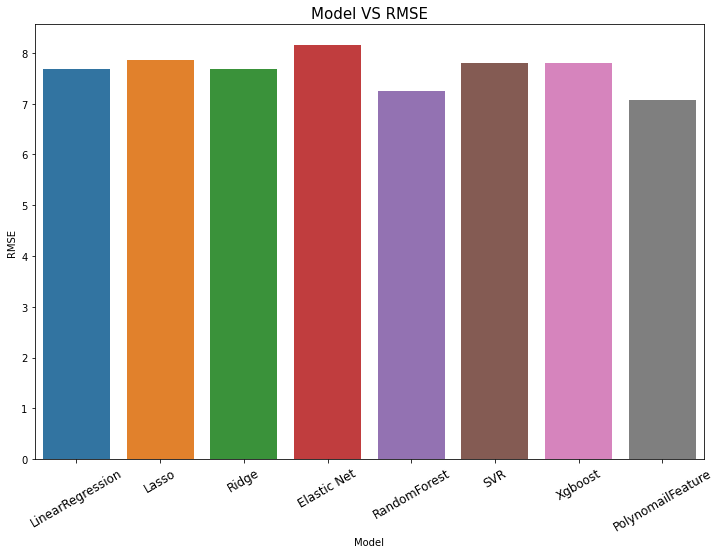

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Model VS RMSE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

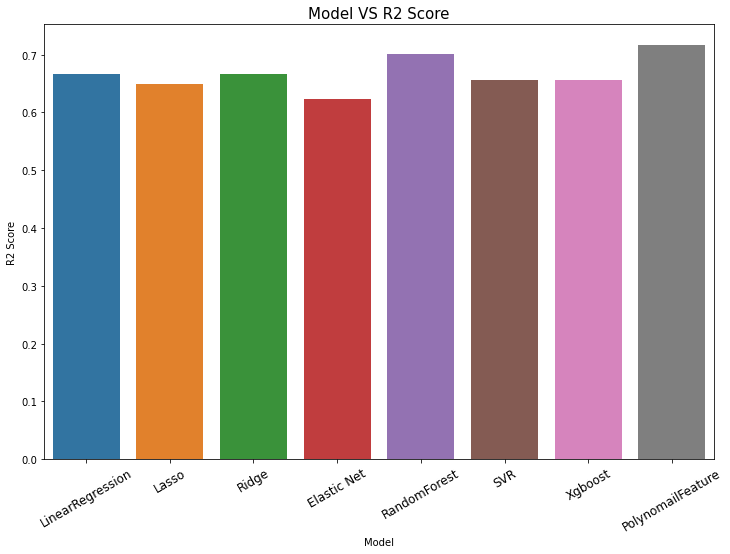

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("Model VS R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Lowest RMSE (Cross-validation)

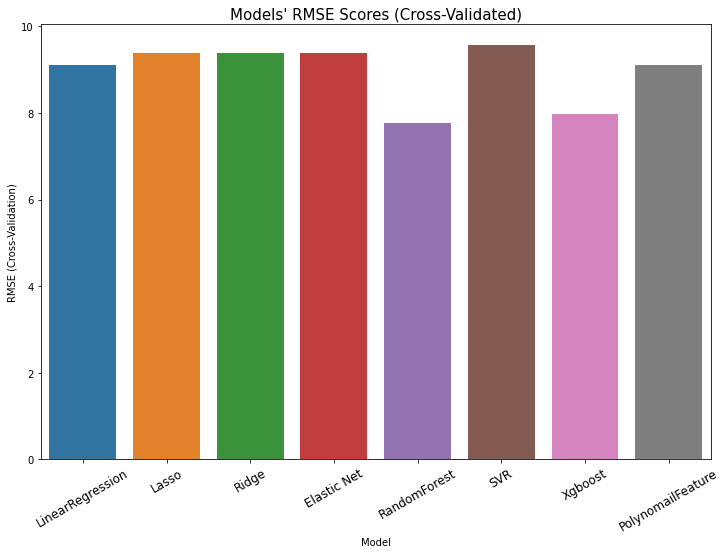

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()